In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Handling Missing Values

In [6]:
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'workclass': ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
Unique values in 'education': ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
Unique values in 'marital.status': ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
Unique values in 'occupation': ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
Unique values in 'relationship': ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
Unique values in 'race': ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
Unique values in 'sex': [

In [7]:
col_has_missing = (df == '?').any()
col_has_missing[col_has_missing]

workclass         True
occupation        True
native.country    True
dtype: bool

In [8]:
df.replace('?', np.nan, inplace=True)

In [9]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0]

workclass         1836
occupation        1843
native.country     583
dtype: int64

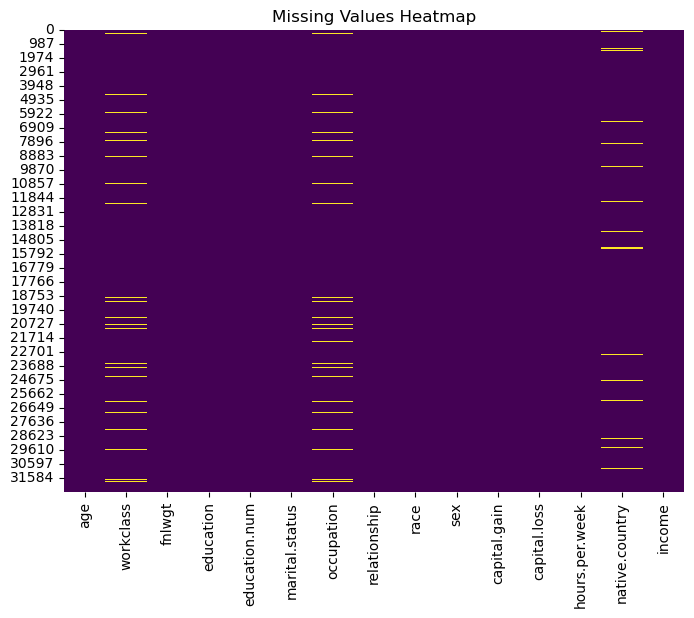

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [10]:
df = df.dropna()
df.shape

(30162, 15)

# Removing Duplicate Values

In [11]:
df.duplicated().sum()

23

In [20]:
df = df.drop_duplicates()
df.shape

(30139, 15)

# EDA

In [12]:
numeric_columns = df.select_dtypes(include='number').columns
numeric_columns

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

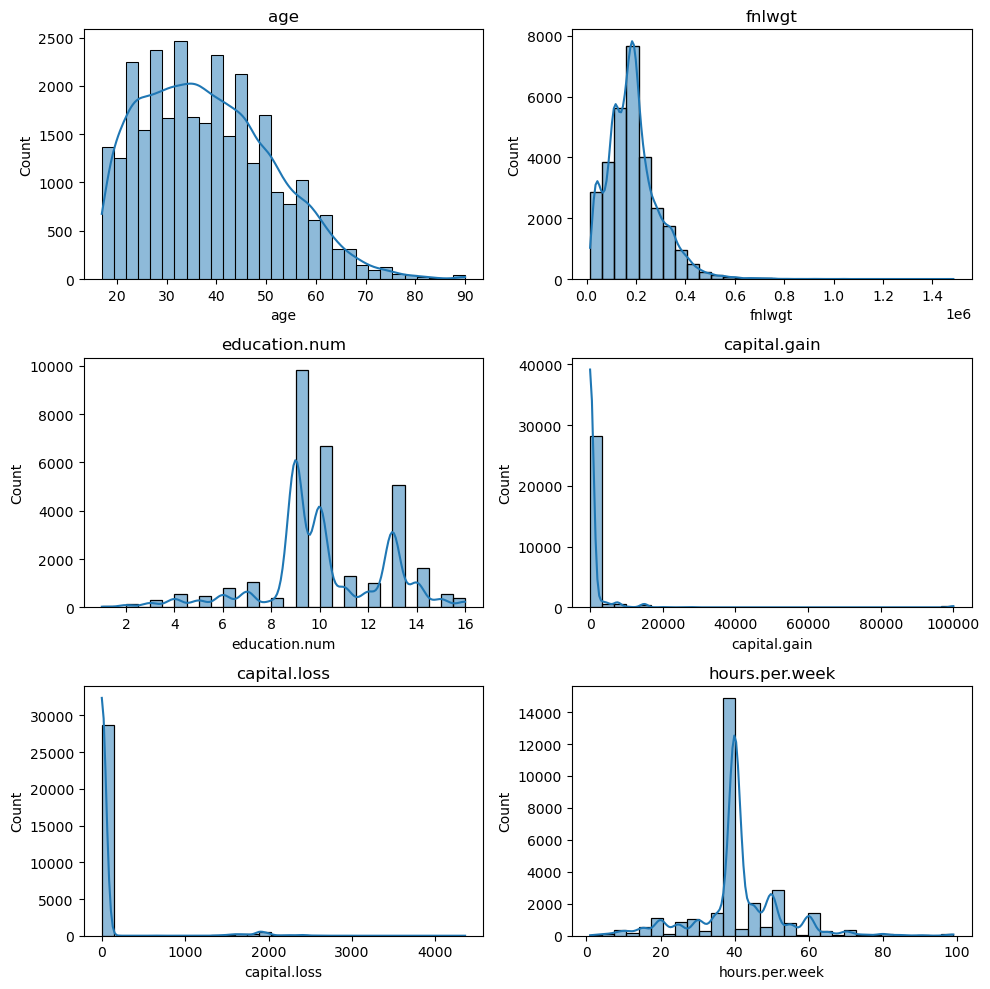

In [13]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(numeric_columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
    plt.tight_layout()
plt.show()

<Axes: xlabel='capital.gain'>

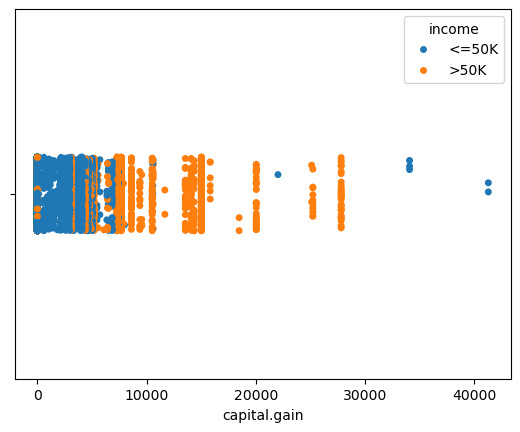

In [14]:
sns.stripplot(data=df[df["capital.gain"] <= 50000], x="capital.gain", hue="income", jitter=True)

<Axes: xlabel='capital.gain'>

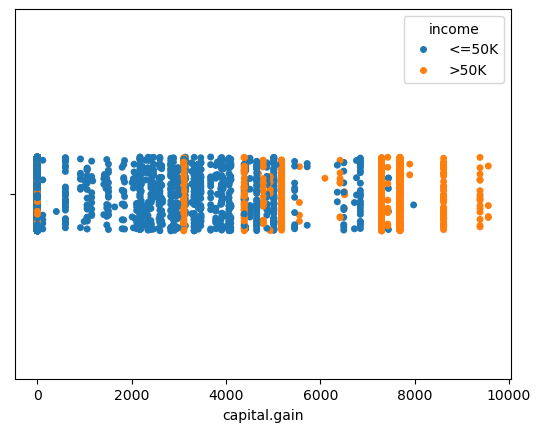

In [15]:
sns.stripplot(data=df[df["capital.gain"] <= 10000], x="capital.gain", hue="income", jitter=True)

<Axes: xlabel='capital.loss'>

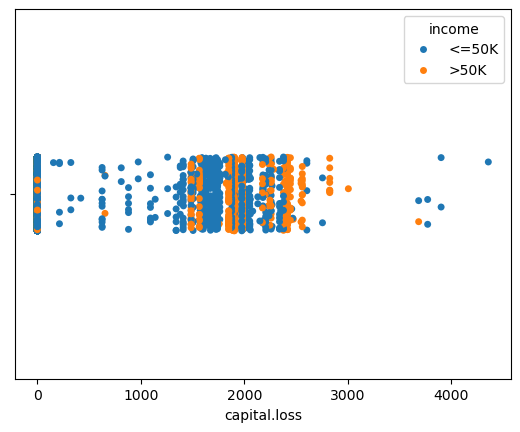

In [16]:
sns.stripplot(data=df, x="capital.loss", hue="income", jitter=True)

<Axes: xlabel='capital.loss'>

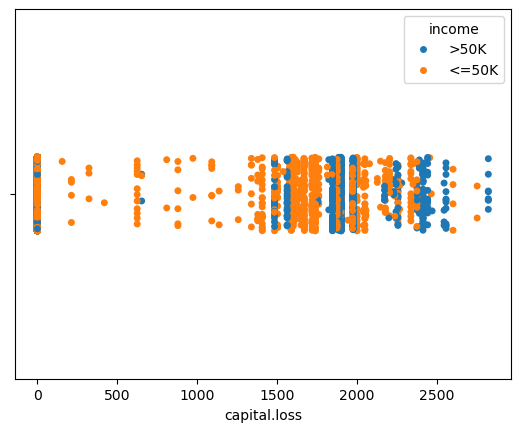

In [17]:
sns.stripplot(data=df[df["capital.loss"] < 3000], x="capital.loss", hue="income", jitter=True)

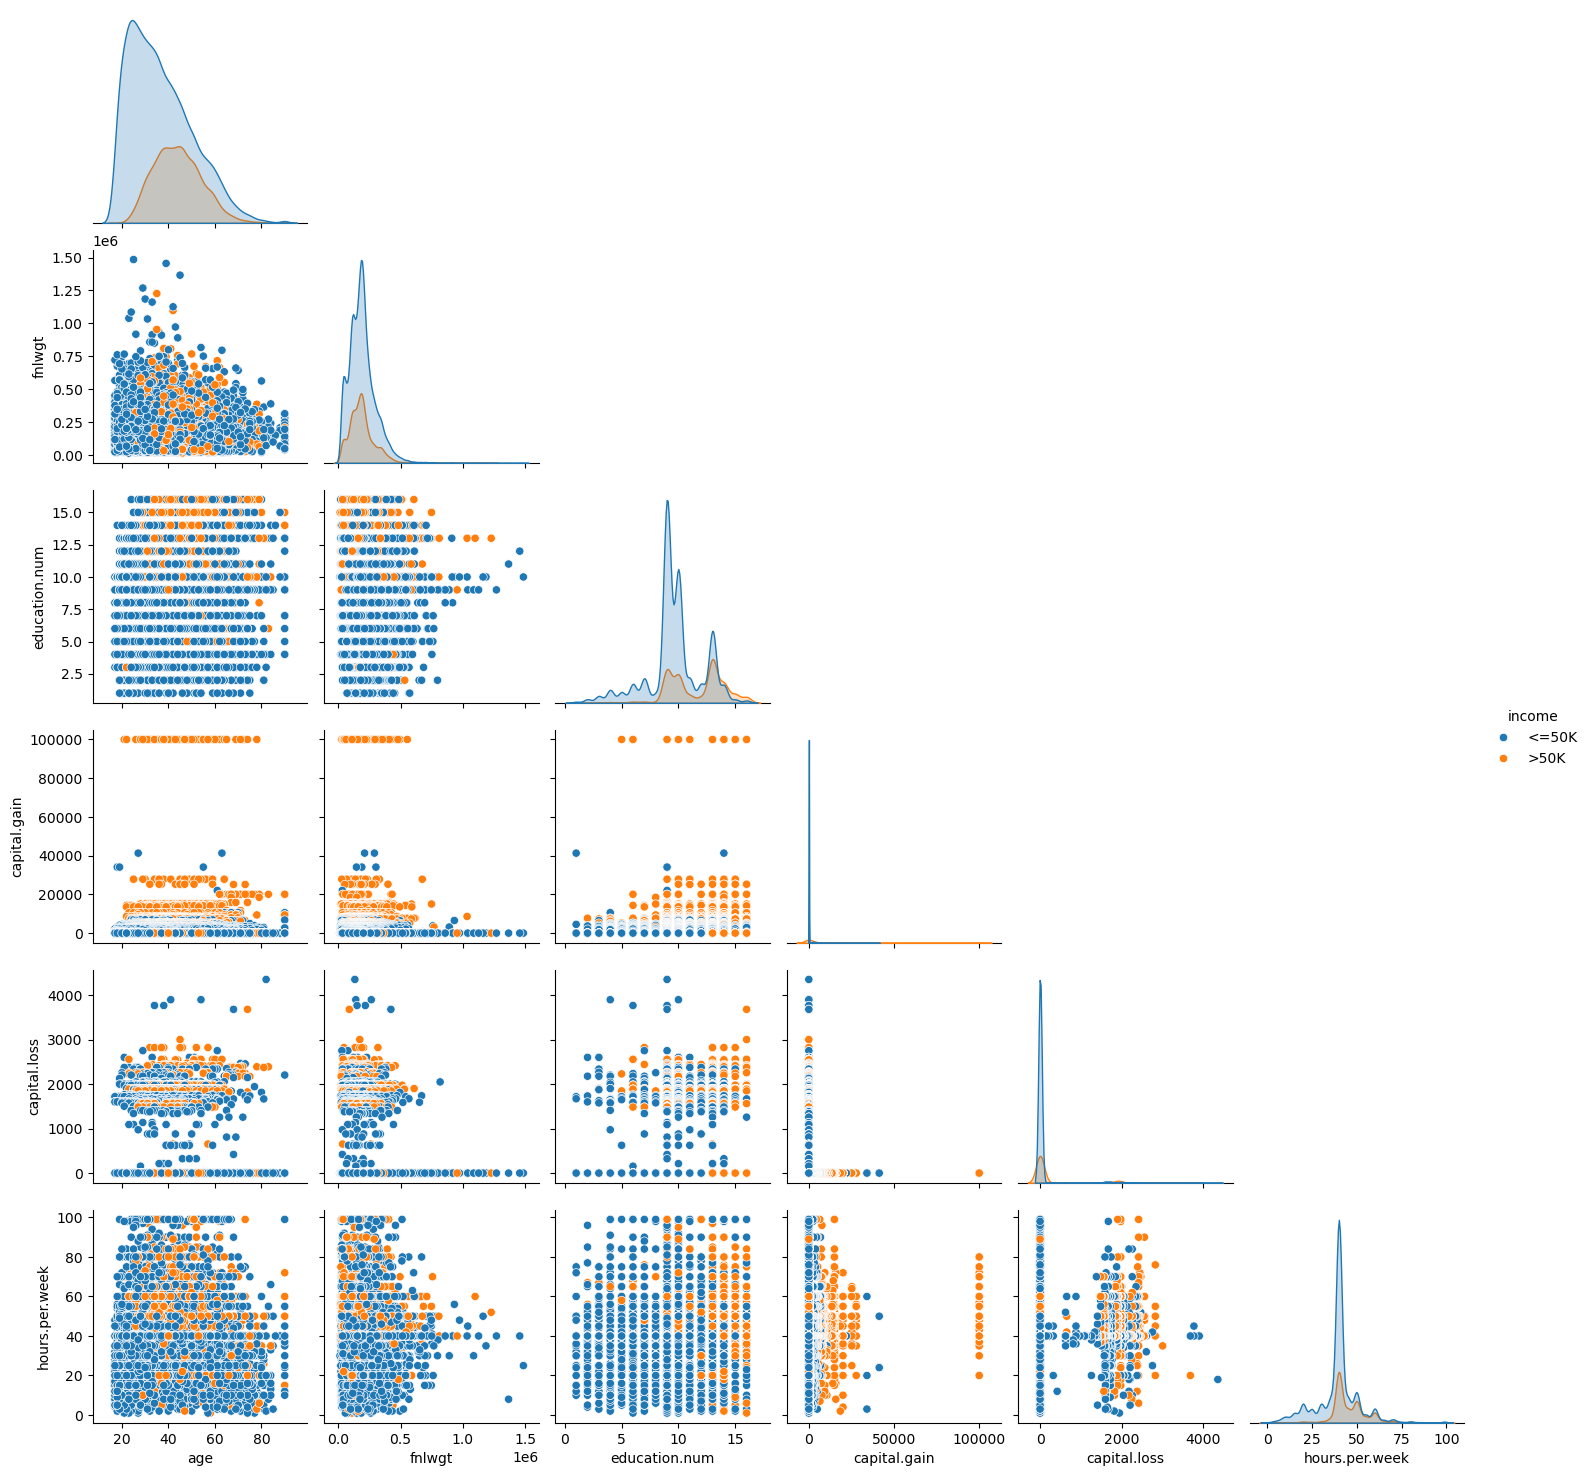

In [18]:
sns.pairplot(df, hue='income', corner=True)
plt.show()

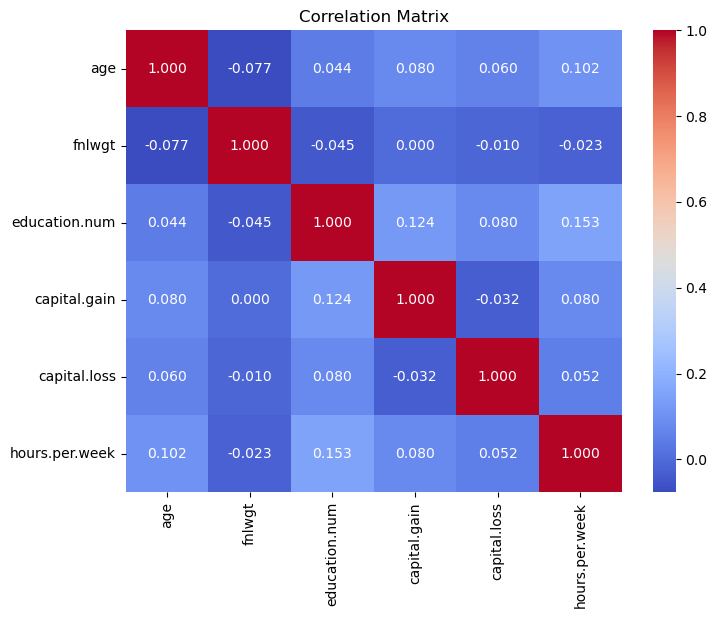

In [19]:
# Plot correlation matrix
plt.figure(figsize=(8, 6))
corr = df[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Matrix')
plt.show()

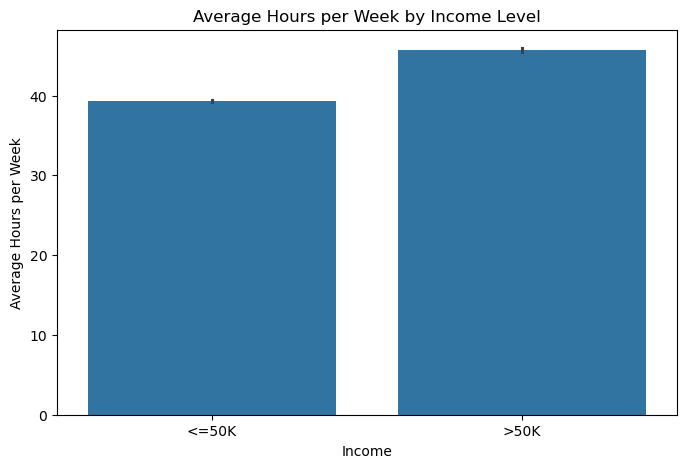

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(x='income', y='hours.per.week', data=df)
plt.title('Average Hours per Week by Income Level')
plt.xlabel('Income')
plt.ylabel('Average Hours per Week')
plt.show()

<Figure size 1200x700 with 0 Axes>

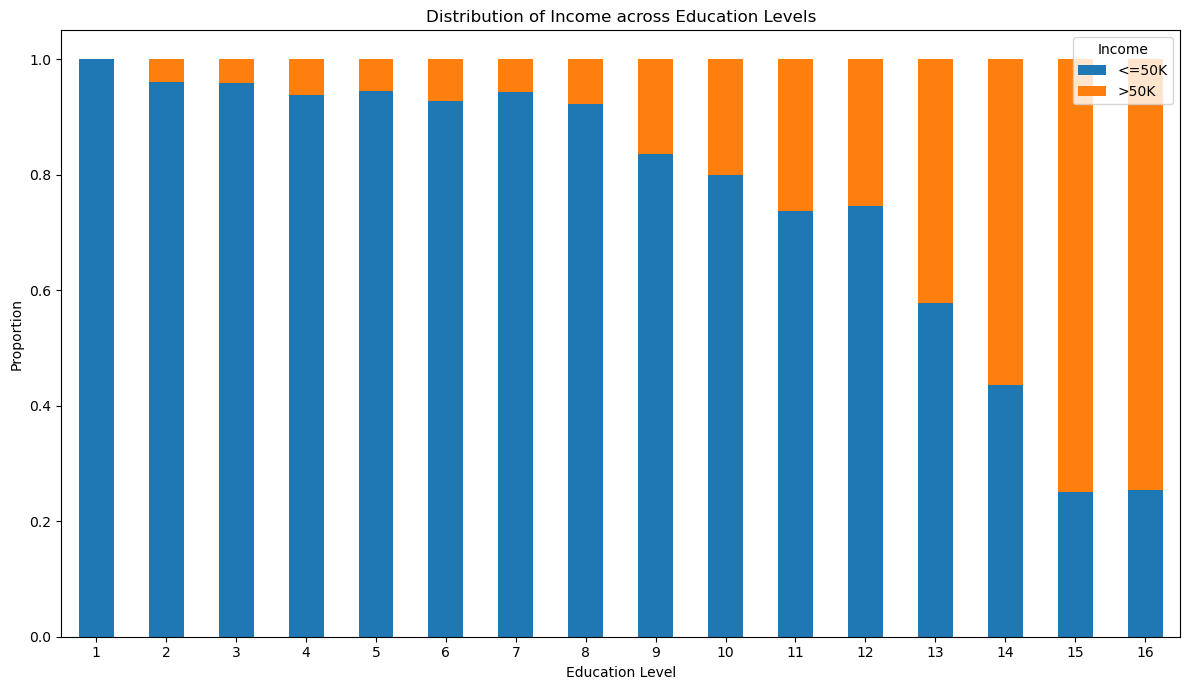

In [21]:
plt.figure(figsize=(12, 7))
education_income = df.groupby('education.num')['income'].value_counts(normalize=True).unstack().fillna(0)
education_income.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Distribution of Income across Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Income')
plt.tight_layout()
plt.show()

<Axes: xlabel='capital.gain', ylabel='Count'>

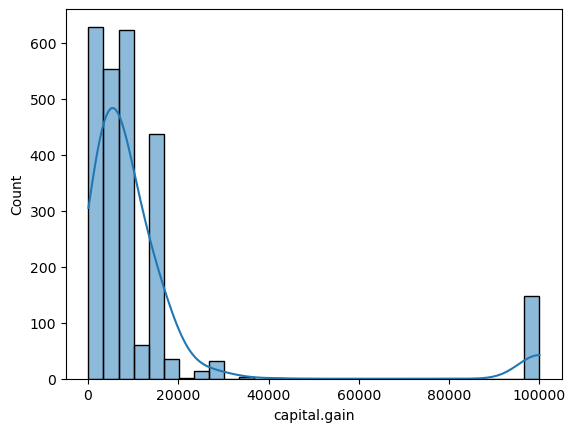

In [22]:
pos_gain = df[df["capital.gain"] > 0]["capital.gain"]
sns.histplot(pos_gain, kde=True, bins=30)

<Axes: xlabel='capital.loss', ylabel='Count'>

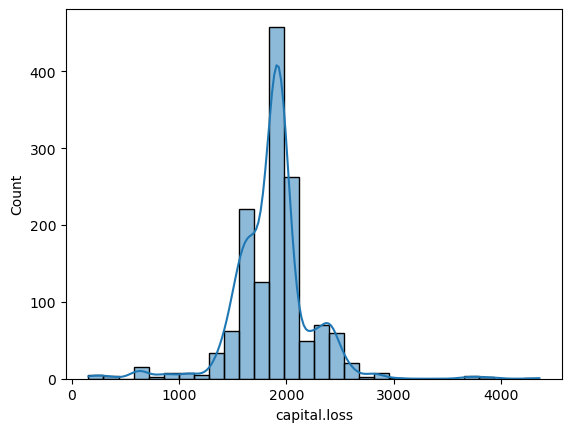

In [23]:
pos_loss = df[df["capital.loss"] > 0]["capital.loss"]
sns.histplot(pos_loss, kde=True, bins=30)

In [24]:
# Remove capital.gain values above 30,000
# Do IQR removal for capital.loss values above 0

df = df[df["capital.gain"] <= 30_000]

pos_vals = df[df["capital.loss"] > 0]["capital.loss"]

In [25]:
Q1, Q3 = np.percentile(pos_vals, [25, 75])
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filter_criteria = (
    (df["capital.loss"] == 0) | 
    (df["capital.loss"] >= lower_bound) & (df["capital.loss"] <= upper_bound)
)

df = df[filter_criteria]
df.shape

(29913, 15)

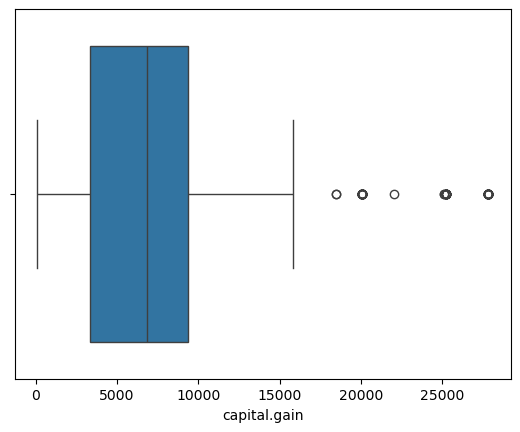

In [26]:
sns.boxplot(x=df[df["capital.gain"] > 0]["capital.gain"])
plt.show()

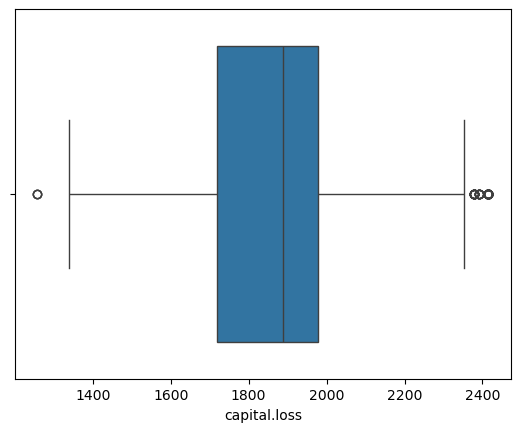

In [27]:
sns.boxplot(x=df[df["capital.loss"] > 0]["capital.loss"])
plt.show()

In [28]:
# Calculate skew and sort
skew_feats = df[numeric_columns].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_feats})
skewness

,Skew
capital.gain,5.495774
capital.loss,4.536080
fnlwgt,1.462403
age,0.535238
hours.per.week,0.329184
education.num,-0.311412


# Viewing Categorical Values

In [29]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [30]:
df[["education.num", "education"]].value_counts().reset_index().sort_values(by="education.num")

,education.num,education,count
15,1,Preschool,44
14,2,1st-4th,150
13,3,5th-6th,287
8,4,7th-8th,555
10,5,9th,453
7,6,10th,813
5,7,11th,1044
11,8,12th,377
0,9,HS-grad,9790
1,10,Some-college,6655


In [31]:
df["workclass"].value_counts()

workclass
Private             22133
Self-emp-not-inc     2462
Local-gov            2056
State-gov            1273
Self-emp-inc         1037
Federal-gov           938
Without-pay            14
Name: count, dtype: int64

In [32]:
df['marital.status'].value_counts()

marital.status
Married-civ-spouse       13934
Never-married             9688
Divorced                  4160
Separated                  925
Widowed                    818
Married-spouse-absent      367
Married-AF-spouse           21
Name: count, dtype: int64

In [33]:
df['occupation'].value_counts()

occupation
Craft-repair         4015
Prof-specialty       3952
Exec-managerial      3931
Adm-clerical         3703
Sales                3547
Other-service        3205
Machine-op-inspct    1961
Transport-moving     1565
Handlers-cleaners    1349
Farming-fishing       986
Tech-support          906
Protective-serv       641
Priv-house-serv       143
Armed-Forces            9
Name: count, dtype: int64

In [34]:
df['race'].value_counts()

race
White                 25710
Black                  2804
Asian-Pac-Islander      885
Amer-Indian-Eskimo      286
Other                   228
Name: count, dtype: int64

In [35]:
df['sex'].value_counts()

sex
Male      20208
Female     9705
Name: count, dtype: int64

In [36]:
df['sex'] = df['sex'].apply(lambda x: 1 if x == "Male" else 0)

In [38]:
df['native.country'].value_counts(normalize=True)

native.country
United-States                 0.911711
Mexico                        0.020292
Philippines                   0.006185
Germany                       0.004246
Puerto-Rico                   0.003610
Canada                        0.003544
El-Salvador                   0.003343
India                         0.003243
Cuba                          0.003076
England                       0.002875
Jamaica                       0.002674
South                         0.002374
Italy                         0.002273
China                         0.002273
Dominican-Republic            0.002206
Guatemala                     0.002106
Vietnam                       0.002106
Japan                         0.001939
Poland                        0.001872
Columbia                      0.001872
Iran                          0.001404
Haiti                         0.001404
Taiwan                        0.001371
Portugal                      0.001137
Nicaragua                     0.001103
Peru      

In [39]:
# Only 1% are not from the US, so we can group all non-US countries into one category
df['native.country'] = df['native.country'].apply(
    lambda x: 'United-States' if x == 'United-States' else 'Non-US'
)

In [40]:
df['relationship'].value_counts()

relationship
Husband           12343
Not-in-family      7662
Own-child          4459
Unmarried          3167
Wife               1397
Other-relative      885
Name: count, dtype: int64

In [41]:
df['income'].value_counts()

income
<=50K    22594
>50K      7319
Name: count, dtype: int64

In [42]:
df['income'] = df['income'].apply(lambda x: 1 if x == ">50K" else 0)

In [43]:
# Save cleaned data
df.to_csv('artifacts/adult_cleaned.csv', index=False)